In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('data\\who_suicide_statistics.csv')
df

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN


In [ ]:
# To consider - zoom into a particular country with high suicide rates, and analyse the suicide trends over the years?

In [4]:
df.isna().any()[lambda x: x]

# The columns with NaN values

suicides_no    True
population     True
dtype: bool

In [10]:
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['suicides_no', 'population'])
df_copy

# Dropped rows where values in 'suicides_no' and 'population' are NaN

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0
...,...,...,...,...,...,...
43759,Virgin Islands (USA),2015,male,25-34 years,2.0,4609.0
43760,Virgin Islands (USA),2015,male,35-54 years,1.0,12516.0
43761,Virgin Islands (USA),2015,male,5-14 years,0.0,7291.0
43762,Virgin Islands (USA),2015,male,55-74 years,0.0,12615.0


In [11]:
df_copy[df_copy['suicides_no']==df_copy['suicides_no'].max()]

# Row with the highest suicide number.

,country,year,sex,age,suicides_no,population
33128,Russian Federation,1994,male,35-54 years,22338.0,19044200.0


In [16]:
df_copytop10= df_copy.sort_values('suicides_no', ascending=False).nlargest(10, 'suicides_no')
df_copytop10

# Rows with the highest suicide numbers in descending order.
# Interestingly the numbers belong to the same country, gender and age group.

,country,year,sex,age,suicides_no,population
33128,Russian Federation,1994,male,35-54 years,22338.0,19044200.0
33140,Russian Federation,1995,male,35-54 years,21706.0,19249600.0
33212,Russian Federation,2001,male,35-54 years,21262.0,21476420.0
33200,Russian Federation,2000,male,35-54 years,21063.0,21378098.0
33188,Russian Federation,1999,male,35-54 years,20705.0,21016400.0
33152,Russian Federation,1996,male,35-54 years,20562.0,19507100.0
33116,Russian Federation,1993,male,35-54 years,20256.0,18908000.0
33224,Russian Federation,2002,male,35-54 years,20119.0,21320535.0
33164,Russian Federation,1997,male,35-54 years,18973.0,19913400.0
33236,Russian Federation,2003,male,35-54 years,18681.0,21007346.0


In [37]:
# However, as it only shows from 1993-2003 and excludes 1998, we will slice the rows from Russian Federation for all years for men between 35-54 years.

df_russia = df_copy[df_copy["country"] == 'Russian Federation']
df_russia_male = df_russia[df_russia["sex"] == 'male']
df_russia_male_35_54years = df_russia_male[df_russia_male["age"] =='35-54 years']
df_russia_male_35_54years

,country,year,sex,age,suicides_no,population
32960,Russian Federation,1980,male,35-54 years,17610.0,17229600.0
32972,Russian Federation,1981,male,35-54 years,17355.0,17023600.0
32984,Russian Federation,1982,male,35-54 years,17215.0,16915700.0
33020,Russian Federation,1985,male,35-54 years,14891.0,16814300.0
33032,Russian Federation,1986,male,35-54 years,9815.0,16977100.0
33044,Russian Federation,1987,male,35-54 years,10040.0,17245900.0
33056,Russian Federation,1988,male,35-54 years,10621.0,17597600.0
33068,Russian Federation,1989,male,35-54 years,12030.0,18058500.0
33080,Russian Federation,1990,male,35-54 years,12517.0,18495100.0
33092,Russian Federation,1991,male,35-54 years,12746.0,18782900.0


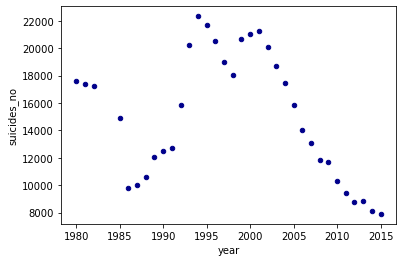

In [39]:
ax1 = df_russia_male_35_54years.plot.scatter(x='year', y='suicides_no', c='DarkBlue')

# While there has been an upwards trend of suicide numbers since around 1985, with 1994 being the year with the highest number of suicides in Russia, the numbers have been decreasing since after 2001.